In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_plot_original(dataset, stateKey, key, fever, title, green_label, amber_label, red_label, xlabel, ylabel, xticks, yticks):
    state_good = dataset[(dataset[stateKey] == 'good') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]
    state_caution = dataset[(dataset[stateKey] == 'caution') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]
    state_danger = dataset[(dataset[stateKey] == 'danger') & (dataset['temperature'] >= 38.5 if fever else dataset['temperature'] < 38.5)]

    plt.scatter(state_good[key], state_good['ageInMonths']/12, label=f'{green_label} | {len(state_good)}', color='#44dd44', marker='.', s=20)
    plt.scatter(state_caution[key], state_caution['ageInMonths']/12, label=f'{amber_label} | {len(state_caution)}', color='#dd9944', marker='.', s=20)
    plt.scatter(state_danger[key], state_danger['ageInMonths']/12, label=f'{red_label} | {len(state_danger)}', color='#dd4444', marker='.', s=20)
    
    plt.title(title)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(np.arange(*xticks))
    plt.yticks(np.arange(*yticks))
    plt.legend()

In [3]:
df = pd.read_csv('./data/rawAnalysisData.csv', header=[0])


In [4]:
# initial filters
df = df[(df['ageInMonths'] > 0) & (df['ageInMonths'] <= 100*12)]
df = df[(df['temperature'] >= 34.5) & (df['temperature'] < 43.5)]
# feature specific filters
df_rr = df[(df['respiratoryRate'] >= 10) & (df['respiratoryRate'] < 80)]
df_ps = df[(df['pulse'] >= 40) & (df['pulse'] < 220)]


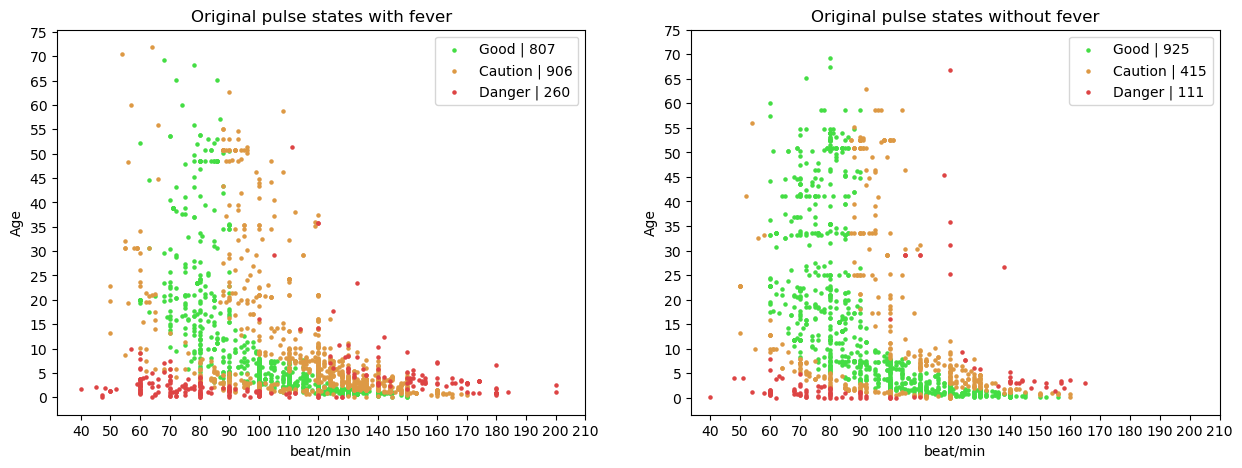

In [5]:
state_labels = ('Good', 'Caution', 'Danger')

plt.subplots(figsize=(15,5))

xticks = (40,220,10)
yticks = (0,80,5)
plt.subplot(1,2,1)
create_plot_original(df_ps, 'pulseState', 'pulse', True, 'Original pulse states with fever', *state_labels, 'Age', 'beat/min', xticks, yticks)
plt.subplot(1,2,2)
create_plot_original(df_ps, 'pulseState', 'pulse', False, 'Original pulse states without fever', *state_labels, 'Age', 'beat/min', xticks, yticks)


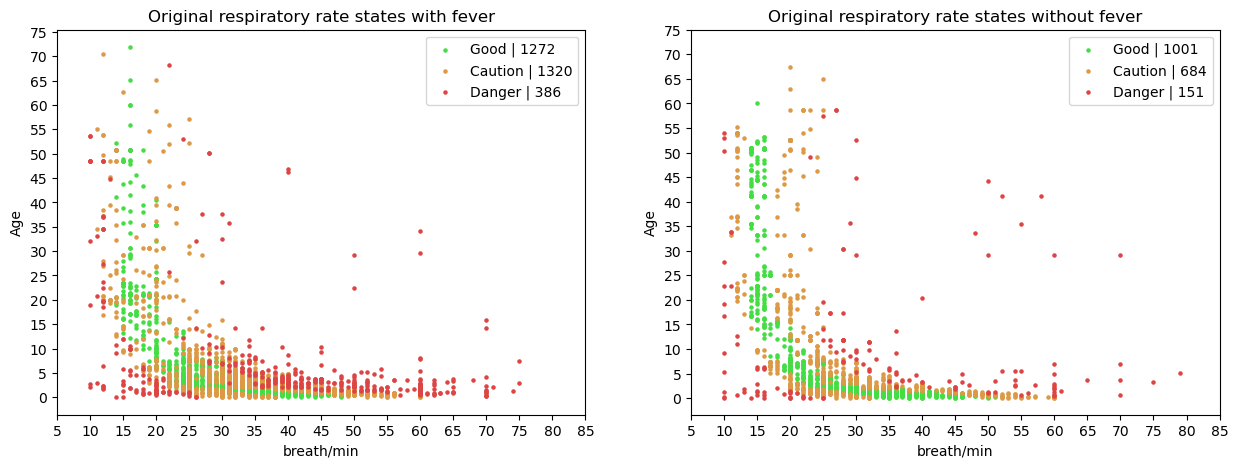

In [6]:
state_labels = ('Good', 'Caution', 'Danger')

plt.subplots(figsize=(15,5))

xticks = (5,90,5)
yticks = (0,80,5)
plt.subplot(1,2,1)
create_plot_original(df_rr, 'respiratoryRateState', 'respiratoryRate', True, 'Original respiratory rate states with fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(1,2,2)
create_plot_original(df_rr, 'respiratoryRateState', 'respiratoryRate', False, 'Original respiratory rate states without fever', *state_labels, 'Age', 'breath/min', xticks, yticks)

In [7]:
df_new = pd.read_csv('./data/latest-algo-data.csv', header=[0])


In [8]:
# initial filters
df_new = df_new[(df_new['ageInMonths'] > 0) & (df_new['ageInMonths'] <= 100*12)]
df_new = df_new[(df_new['temperature'] >= 34.5) & (df_new['temperature'] < 43.5)]
# feature specific filters
df_rr_new = df_new[(df_new['respiratoryRate'] >= 10) & (df_new['respiratoryRate'] < 80)]
df_ps_new = df_new[(df_new['pulse'] >= 40) & (df_new['pulse'] < 220)]

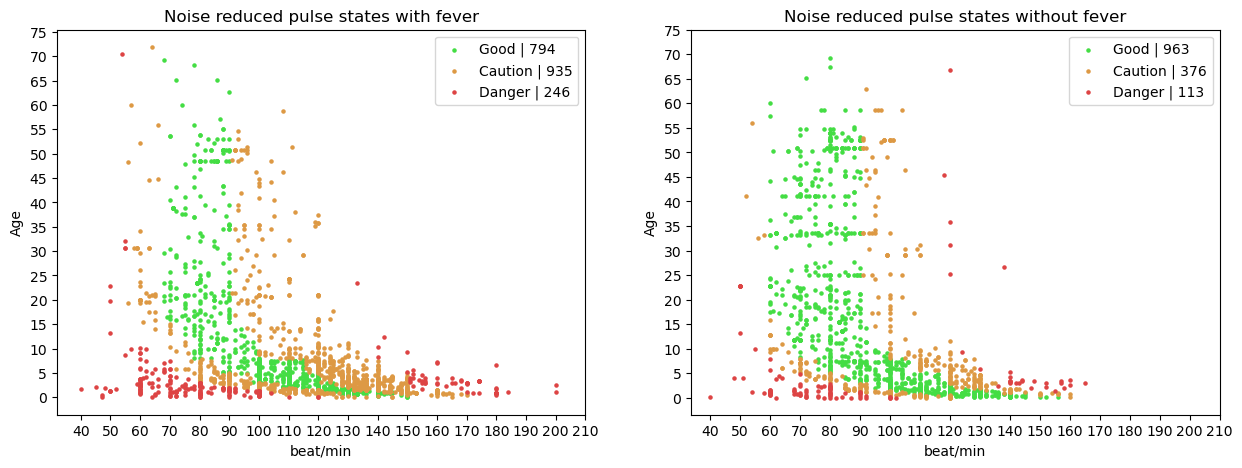

In [9]:
state_labels = ('Good', 'Caution', 'Danger')

plt.subplots(figsize=(15,5))

xticks = (40,220,10)
yticks = (0,80,5)
plt.subplot(1,2,1)
create_plot_original(df_ps_new, 'pulseState', 'pulse', True, 'Noise reduced pulse states with fever', *state_labels, 'Age', 'beat/min', xticks, yticks)
plt.subplot(1,2,2)
create_plot_original(df_ps_new, 'pulseState', 'pulse', False, 'Noise reduced pulse states without fever', *state_labels, 'Age', 'beat/min', xticks, yticks)

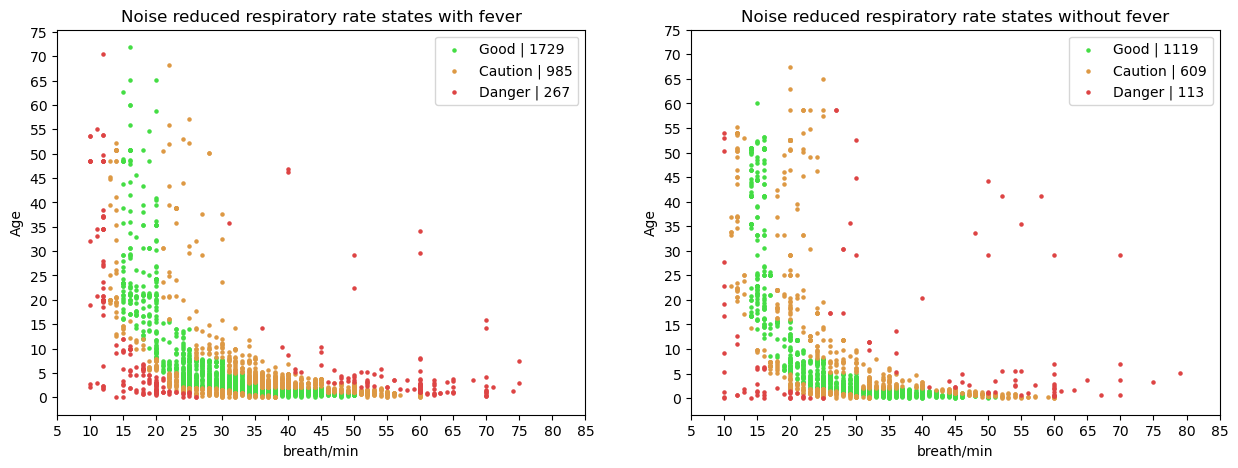

In [10]:
state_labels = ('Good', 'Caution', 'Danger')

plt.subplots(figsize=(15,5))

xticks = (5,90,5)
yticks = (0,80,5)
plt.subplot(1,2,1)
create_plot_original(df_rr_new, 'respiratoryRateState', 'respiratoryRate', True, 'Noise reduced respiratory rate states with fever', *state_labels, 'Age', 'breath/min', xticks, yticks)
plt.subplot(1,2,2)
create_plot_original(df_rr_new, 'respiratoryRateState', 'respiratoryRate', False, 'Noise reduced respiratory rate states without fever', *state_labels, 'Age', 'breath/min', xticks, yticks)